In [1]:
from __future__ import division
import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import glob
from scipy.stats import norm
import matplotlib.mlab as mlab
import sys

In [11]:
secs_per_year = 31536000
years = 1
nb_dir = '/home/dup193/work/double_pulse/stat_analysis'
if nb_dir not in sys.path:
    sys.path.append(nb_dir)
from event_selection import EventSelection,GetRatesAtmos,EventSelectionPreCut

In [3]:
 def GetRates(data_tc,data_tn,data_mc,data_mn,data_ec,data_en,data_eg,data_c,livetime,weight_name='weight_val_0',wtype ='nom',norm=1):
    
    sig =  data_tc[weight_name][wtype]
    bkg =  np.concatenate((data_tn[weight_name][wtype],data_mc[weight_name][wtype],data_mn[weight_name][wtype],\
                            data_ec[weight_name][wtype],data_en[weight_name][wtype],data_eg[weight_name][wtype],\
                            data_c['weight_val']*norm), axis = 0)
    
    sig_rate = np.sum(sig)*livetime 
    sig_err = np.sqrt(np.sum(np.square(sig*livetime)))
    print("Signal events: {0:d}, rate: {1:.6f}+/-{2:.6f}".format(sig.shape[0],sig_rate,sig_err))
    
    bkg_rate = np.sum(bkg*livetime) 
    bkg_err = np.sqrt(np.sum(np.square(bkg*livetime)))
    print("Background events: {0:d}, rate: {1:.6f}+/-{2:.6f}".format(bkg.shape[0],bkg_rate,bkg_err))
    
    return sig_rate, sig_err, bkg_rate, bkg_err

In [4]:
data_nom_tc0 = np.load('/fastio2/dasha/double_pulse/data_FLUXES_NuTau_1_1.npy',mmap_mode='r')
data_nom_tn0 = np.load('/fastio2/dasha/double_pulse/data_FLUXES_NuTau_2_1.npy',mmap_mode='r')
data_nom_mc0 = np.load('/fastio2/dasha/double_pulse/data_FLUXES_NuMu_1_1.npy',mmap_mode='r')
data_nom_mn0 = np.load('/fastio2/dasha/double_pulse/data_FLUXES_NuMu_2_1.npy',mmap_mode='r')
data_nom_ec0 = np.load('/fastio2/dasha/double_pulse/data_FLUXES_NuE_1_1.npy',mmap_mode='r')
data_nom_en0 = np.load('/fastio2/dasha/double_pulse/data_FLUXES_NuE_2_1.npy',mmap_mode='r')
data_nom_eg0 = np.load('/fastio2/dasha/double_pulse/data_FLUXES_NuE_3_1.npy',mmap_mode='r')
data_c0 = np.load('/fastio2/dasha/double_pulse/data_MuonGun_all.npy',mmap_mode='r')

In [48]:
data_de117_tc0 = np.load('/fastio2/dasha/double_pulse/data_FLUXES_domeff_117_NuTau_1_1.npy',mmap_mode='r')
data_de117_tn0 = np.load('/fastio2/dasha/double_pulse/data_FLUXES_domeff_117_NuTau_2_1.npy',mmap_mode='r')
data_de117_mc0 = np.load('/fastio2/dasha/double_pulse/data_FLUXES_domeff_117_NuMu_1_1.npy',mmap_mode='r')
data_de117_mn0 = np.load('/fastio2/dasha/double_pulse/data_FLUXES_domeff_117_NuMu_2_1.npy',mmap_mode='r')
data_de117_ec0 = np.load('/fastio2/dasha/double_pulse/data_FLUXES_domeff_117_NuE_1_1.npy',mmap_mode='r')
data_de117_en0 = np.load('/fastio2/dasha/double_pulse/data_FLUXES_domeff_117_NuE_2_1.npy',mmap_mode='r')
data_de117_eg0 = np.load('/fastio2/dasha/double_pulse/data_FLUXES_domeff_117_NuE_3_1.npy',mmap_mode='r')

In [50]:
data_de081_tc0 = np.load('/fastio2/dasha/double_pulse/data_FLUXES_domeff_081_NuTau_1_1.npy',mmap_mode='r')
data_de081_tn0 = np.load('/fastio2/dasha/double_pulse/data_FLUXES_domeff_081_NuTau_2_1.npy',mmap_mode='r')
data_de081_mc0 = np.load('/fastio2/dasha/double_pulse/data_FLUXES_domeff_081_NuMu_1_1.npy',mmap_mode='r')
data_de081_mn0 = np.load('/fastio2/dasha/double_pulse/data_FLUXES_domeff_081_NuMu_2_1.npy',mmap_mode='r')
data_de081_ec0 = np.load('/fastio2/dasha/double_pulse/data_FLUXES_domeff_081_NuE_1_1.npy',mmap_mode='r')
data_de081_en0 = np.load('/fastio2/dasha/double_pulse/data_FLUXES_domeff_081_NuE_2_1.npy',mmap_mode='r')
data_de081_eg0 = np.load('/fastio2/dasha/double_pulse/data_FLUXES_domeff_081_NuE_3_1.npy',mmap_mode='r')

In [51]:
data_abs_tc0 = np.load('/fastio2/dasha/double_pulse/data_FLUXES_abs10_NuTau_1_1.npy',mmap_mode='r')
data_abs_tn0 = np.load('/fastio2/dasha/double_pulse/data_FLUXES_abs_NuTau_2_1.npy',mmap_mode='r')
data_abs_mc0 = np.load('/fastio2/dasha/double_pulse/data_FLUXES_abs_NuMu_1_1.npy',mmap_mode='r')
data_abs_mn0 = np.load('/fastio2/dasha/double_pulse/data_FLUXES_abs_NuMu_2_1.npy',mmap_mode='r')
data_abs_ec0 = np.load('/fastio2/dasha/double_pulse/data_FLUXES_abs_NuE_1_1.npy',mmap_mode='r')
data_abs_en0 = np.load('/fastio2/dasha/double_pulse/data_FLUXES_abs_NuE_2_1.npy',mmap_mode='r')
data_abs_eg0 = np.load('/fastio2/dasha/double_pulse/data_FLUXES_abs_NuE_3_1.npy',mmap_mode='r')

In [52]:
data_scatabs_tc0 = np.load('/fastio2/dasha/double_pulse/data_FLUXES_scatabs7_NuTau_1_1.npy',mmap_mode='r')
data_scatabs_tn0 = np.load('/fastio2/dasha/double_pulse/data_FLUXES_scatabs_NuTau_2_1.npy',mmap_mode='r')
data_scatabs_mc0 = np.load('/fastio2/dasha/double_pulse/data_FLUXES_scatabs_NuMu_1_1.npy',mmap_mode='r')
data_scatabs_mn0 = np.load('/fastio2/dasha/double_pulse/data_FLUXES_scatabs_NuMu_2_1.npy',mmap_mode='r')
data_scatabs_ec0 = np.load('/fastio2/dasha/double_pulse/data_FLUXES_scatabs_NuE_1_1.npy',mmap_mode='r')
data_scatabs_en0 = np.load('/fastio2/dasha/double_pulse/data_FLUXES_scatabs_NuE_2_1.npy',mmap_mode='r')
data_scatabs_eg0 = np.load('/fastio2/dasha/double_pulse/data_FLUXES_scatabs_NuE_3_1.npy',mmap_mode='r')

In [72]:
data_scat_tc0 = np.load('/fastio2/dasha/double_pulse/data_FLUXES_scat10_NuTau_1_1.npy',mmap_mode='r')
data_scat_tn0 = np.load('/fastio2/dasha/double_pulse/data_FLUXES_scat_NuTau_2_1.npy',mmap_mode='r')
data_scat_mc0 = np.load('/fastio2/dasha/double_pulse/data_FLUXES_scat_NuMu_1_1.npy',mmap_mode='r')
data_scat_mn0 = np.load('/fastio2/dasha/double_pulse/data_FLUXES_scat_NuMu_2_1.npy',mmap_mode='r')
data_scat_ec0 = np.load('/fastio2/dasha/double_pulse/data_FLUXES_scat_NuE_1_1.npy',mmap_mode='r')
data_scat_en0 = np.load('/fastio2/dasha/double_pulse/data_FLUXES_scat_NuE_2_1.npy',mmap_mode='r')
data_scat_eg0 = np.load('/fastio2/dasha/double_pulse/data_FLUXES_scat_NuE_3_1.npy',mmap_mode='r')

In [73]:
data_p1_tc0 = np.load('/fastio2/dasha/double_pulse/data_FLUXES_p2_plus1_NuTau_1_1.npy',mmap_mode='r')
data_p1_tn0 = np.load('/fastio2/dasha/double_pulse/data_FLUXES_p2p1_NuTau_2_1.npy',mmap_mode='r')
data_p1_mc0 = np.load('/fastio2/dasha/double_pulse/data_FLUXES_p2p1_NuMu_1_1.npy',mmap_mode='r')
data_p1_mn0 = np.load('/fastio2/dasha/double_pulse/data_FLUXES_p2p1_NuMu_2_1.npy',mmap_mode='r')
data_p1_ec0 = np.load('/fastio2/dasha/double_pulse/data_FLUXES_p2p1_NuE_1_1.npy',mmap_mode='r')
data_p1_en0 = np.load('/fastio2/dasha/double_pulse/data_FLUXES_p2p1_NuE_2_1.npy',mmap_mode='r')
data_p1_eg0 = np.load('/fastio2/dasha/double_pulse/data_FLUXES_p2p1_NuE_3_1.npy',mmap_mode='r')

In [74]:
data_m1_tc0 = np.load('/fastio2/dasha/double_pulse/data_FLUXES_p2_minus1_NuTau_1_1.npy',mmap_mode='r')
data_m1_tn0 = np.load('/fastio2/dasha/double_pulse/data_FLUXES_p2m1_NuTau_2_1.npy',mmap_mode='r')
data_m1_mc0 = np.load('/fastio2/dasha/double_pulse/data_FLUXES_p2m1_NuMu_1_1.npy',mmap_mode='r')
data_m1_mn0 = np.load('/fastio2/dasha/double_pulse/data_FLUXES_p2m1_NuMu_2_1.npy',mmap_mode='r')
data_m1_ec0 = np.load('/fastio2/dasha/double_pulse/data_FLUXES_p2m1_NuE_1_1.npy',mmap_mode='r')
data_m1_en0 = np.load('/fastio2/dasha/double_pulse/data_FLUXES_p2m1_NuE_2_1.npy',mmap_mode='r')
data_m1_eg0 = np.load('/fastio2/dasha/double_pulse/data_FLUXES_p2m1_NuE_3_1.npy',mmap_mode='r')

In [75]:
data_m3_tc0 = np.load('/fastio2/dasha/double_pulse/data_FLUXES_p2_minus3_NuTau_1_1.npy',mmap_mode='r')
data_m3_tn0 = np.load('/fastio2/dasha/double_pulse/data_FLUXES_p2m3_NuTau_2_1.npy',mmap_mode='r')
data_m3_mc0 = np.load('/fastio2/dasha/double_pulse/data_FLUXES_p2m3_NuMu_1_1.npy',mmap_mode='r')
data_m3_mn0 = np.load('/fastio2/dasha/double_pulse/data_FLUXES_p2m3_NuMu_2_1.npy',mmap_mode='r')
data_m3_ec0 = np.load('/fastio2/dasha/double_pulse/data_FLUXES_p2m3_NuE_1_1.npy',mmap_mode='r')
data_m3_en0 = np.load('/fastio2/dasha/double_pulse/data_FLUXES_p2m3_NuE_2_1.npy',mmap_mode='r')
data_m3_eg0 = np.load('/fastio2/dasha/double_pulse/data_FLUXES_p2m3_NuE_3_1.npy',mmap_mode='r')

In [166]:
weight_name = 'weight_val_0'


data_nom_tc,data_nom_tn,data_nom_mc,data_nom_mn,data_nom_ec,data_nom_en,data_nom_eg,data_nom_c =\
EventSelection(data_nom_tc0,data_nom_tn0,data_nom_mc0,data_nom_mn0,data_nom_ec0,data_nom_en0,data_nom_eg0,data_c0)

sig_nom, sig_nom_er, bkg_nom, bkg_nom_er = GetRates(data_nom_tc,data_nom_tn,data_nom_mc,data_nom_mn,data_nom_ec,data_nom_en,data_nom_eg,\
                                                    data_nom_c, livetime = secs_per_year*years,weight_name=weight_name,wtype ='nom')
sig_amu, sig_amu_er, bkg_amu, bkg_amu_er = GetRates(data_nom_tc,data_nom_tn,data_nom_mc,data_nom_mn,data_nom_ec,data_nom_en,data_nom_eg,\
                                                    data_nom_c, livetime = secs_per_year*years,weight_name=weight_name,wtype ='nom',norm = 1.3)
sig_aml, sig_aml_er, bkg_aml, bkg_aml_er = GetRates(data_nom_tc,data_nom_tn,data_nom_mc,data_nom_mn,data_nom_ec,data_nom_en,data_nom_eg,\
                                                    data_nom_c,livetime = secs_per_year*years,weight_name=weight_name,wtype ='nom',norm = 0.7)

sig_nu, sig_nu_er, bkg_nu, bkg_nu_er = GetRates(data_nom_tc,data_nom_tn,data_nom_mc,data_nom_mn,data_nom_ec,data_nom_en,data_nom_eg,\
                                                data_nom_c,livetime = secs_per_year*years,weight_name=weight_name,wtype ='nu')
sig_nl, sig_nl_er, bkg_nl, bkg_nl_er = GetRates(data_nom_tc,data_nom_tn,data_nom_mc,data_nom_mn,data_nom_ec,data_nom_en,data_nom_eg,\
                                                data_nom_c,livetime = secs_per_year*years,weight_name=weight_name,wtype ='nl')
sig_su, sig_su_er, bkg_su, bkg_su_er = GetRates(data_nom_tc,data_nom_tn,data_nom_mc,data_nom_mn,data_nom_ec,data_nom_en,data_nom_eg,\
                                                data_nom_c,livetime = secs_per_year*years,weight_name=weight_name,wtype ='su')
sig_sl, sig_sl_er, bkg_sl, bkg_sl_er = GetRates(data_nom_tc,data_nom_tn,data_nom_mc,data_nom_mn,data_nom_ec,data_nom_en,data_nom_eg,\
                                                data_nom_c,livetime = secs_per_year*years,weight_name=weight_name,wtype ='sl')

Signal events: 8311, rate: 0.683441+/-0.014629
Background events: 875, rate: 0.032879+/-0.002786
Signal events: 8311, rate: 0.683441+/-0.014629
Background events: 875, rate: 0.034465+/-0.003113
Signal events: 8311, rate: 0.683441+/-0.014629
Background events: 875, rate: 0.031293+/-0.002516
Signal events: 8311, rate: 0.841406+/-0.018010
Background events: 875, rate: 0.039257+/-0.003212
Signal events: 8311, rate: 0.509357+/-0.010902
Background events: 875, rate: 0.025850+/-0.002357
Signal events: 8311, rate: 0.584995+/-0.014223
Background events: 875, rate: 0.031170+/-0.003025
Signal events: 8311, rate: 0.816925+/-0.015749
Background events: 875, rate: 0.036872+/-0.002764


In [168]:
data_de117_tc,data_de117_tn,data_de117_mc,data_de117_mn,data_de117_ec,data_de117_en,data_de117_eg,data_de117_c =\
EventSelection(data_de117_tc0,data_de117_tn0,data_de117_mc0,data_de117_mn0,data_de117_ec0,data_de117_en0,data_de117_eg0,data_c0)

sig_de117, sig_de117_er, bkg_de117, bkg_de117_er = GetRates(data_de117_tc,data_de117_tn,data_de117_mc,data_de117_mn,data_de117_ec,\
                                                            data_de117_en,data_de117_eg,data_de117_c,livetime = secs_per_year*years,\
                                                            weight_name=weight_name,wtype ='nom')

Signal events: 8603, rate: 0.722473+/-0.014928
Background events: 861, rate: 0.037310+/-0.004979


In [169]:
data_de081_tc,data_de081_tn,data_de081_mc,data_de081_mn,data_de081_ec,data_de081_en,data_de081_eg,data_de081_c =\
EventSelection(data_de081_tc0,data_de081_tn0,data_de081_mc0,data_de081_mn0,data_de081_ec0,data_de081_en0,data_de081_eg0,data_c0)

sig_de081, sig_de081_er, bkg_de081, bkg_de081_er = GetRates(data_de081_tc,data_de081_tn,data_de081_mc,data_de081_mn,data_de081_ec,\
                                                            data_de081_en,data_de081_eg,data_de081_c,livetime = secs_per_year*years,\
                                                            weight_name=weight_name,wtype ='nom')

Signal events: 7764, rate: 0.590128+/-0.012881
Background events: 760, rate: 0.029995+/-0.003378


In [172]:
data_abs_tc,data_abs_tn,data_abs_mc,data_abs_mn,data_abs_ec,data_abs_en,data_abs_eg,data_abs_c =\
EventSelection(data_abs_tc0,data_abs_tn0,data_abs_mc0,data_abs_mn0,data_abs_ec0,data_abs_en0,data_abs_eg0,data_c0)

sig_abs, sig_abs_er, bkg_abs, bkg_abs_er = GetRates(data_abs_tc,data_abs_tn,data_abs_mc,data_abs_mn,data_abs_ec,data_abs_en,\
                                                    data_abs_eg,data_abs_c,livetime = secs_per_year*years,\
                                                    weight_name=weight_name,wtype ='nom')

Signal events: 7739, rate: 0.594937+/-0.013147
Background events: 867, rate: 0.033062+/-0.004187


In [176]:
data_scatabs_tc,data_scatabs_tn,data_scatabs_mc,data_scatabs_mn,data_scatabs_ec,data_scatabs_en,data_scatabs_eg,data_scatabs_c =\
EventSelection(data_scatabs_tc0,data_scatabs_tn0,data_scatabs_mc0,data_scatabs_mn0,data_scatabs_ec0,data_scatabs_en0,data_scatabs_eg0,data_c0)

sig_sa, sig_sa_er, bkg_sa, bkg_sa_er = GetRates(data_scatabs_tc,data_scatabs_tn,data_scatabs_mc,data_scatabs_mn,data_scatabs_ec,\
                                                data_scatabs_en,data_scatabs_eg,data_abs_c,livetime = secs_per_year*years,\
                                                weight_name=weight_name,wtype ='nom')

Signal events: 7466, rate: 0.571284+/-0.012518
Background events: 671, rate: 0.026573+/-0.004262


In [178]:
data_scat_tc,data_scat_tn,data_scat_mc,data_scat_mn,data_scat_ec,data_scat_en,data_scat_eg,data_scat_c =\
EventSelection(data_scat_tc0,data_scat_tn0,data_scat_mc0,data_scat_mn0,data_scat_ec0,data_scat_en0,data_scat_eg0,data_c0)

sig_scat, sig_scat_er, bkg_scat, bkg_scat_er = GetRates(data_scat_tc,data_scat_tn,data_scat_mc,data_scat_mn,data_scat_ec,data_scat_en,\
                                                        data_scat_eg,data_scat_c,livetime = secs_per_year*years,\
                                                        weight_name=weight_name,wtype ='nom')

Signal events: 8023, rate: 0.626846+/-0.013233
Background events: 959, rate: 0.040930+/-0.004704


In [180]:
data_p1_tc,data_p1_tn,data_p1_mc,data_p1_mn,data_p1_ec,data_p1_en,data_p1_eg,data_p1_c =\
EventSelection(data_p1_tc0,data_p1_tn0,data_p1_mc0,data_p1_mn0,data_p1_ec0,data_p1_en0,data_p1_eg0,data_c0)

sig_p1, sig_p1_er, bkg_p1, bkg_p1_er = GetRates(data_p1_tc,data_p1_tn,data_p1_mc,data_p1_mn,data_p1_ec,data_p1_en,data_p1_eg,data_p1_c,\
                                                livetime = secs_per_year*years,weight_name=weight_name,wtype ='nom')

Signal events: 8241, rate: 0.675377+/-0.014699
Background events: 823, rate: 0.043447+/-0.005617


In [182]:
data_m1_tc,data_m1_tn,data_m1_mc,data_m1_mn,data_m1_ec,data_m1_en,data_m1_eg,data_m1_c =\
EventSelection(data_m1_tc0,data_m1_tn0,data_m1_mc0,data_m1_mn0,data_m1_ec0,data_m1_en0,data_m1_eg0,data_c0)

sig_m1, sig_m1_er, bkg_m1, bkg_m1_er = GetRates(data_m1_tc,data_m1_tn,data_m1_mc,data_m1_mn,data_m1_ec,data_m1_en,data_m1_eg,data_p1_c,\
                                                livetime = secs_per_year*years,weight_name=weight_name,wtype ='nom')

Signal events: 8289, rate: 0.682698+/-0.014675
Background events: 816, rate: 0.041412+/-0.007451


In [184]:
data_m3_tc,data_m3_tn,data_m3_mc,data_m3_mn,data_m3_ec,data_m3_en,data_m3_eg,data_m3_c =\
EventSelection(data_m3_tc0,data_m3_tn0,data_m3_mc0,data_m3_mn0,data_m3_ec0,data_m3_en0,data_m3_eg0,data_c0)

sig_m3, sig_m3_er, bkg_m3, bkg_m3_er = GetRates(data_m3_tc,data_m3_tn,data_m3_mc,data_m3_mn,data_m3_ec,data_m3_en,data_m3_eg,data_m3_c,\
                                                livetime = secs_per_year*years,weight_name=weight_name,wtype ='nom')

Signal events: 8444, rate: 0.687748+/-0.014343
Background events: 883, rate: 0.040983+/-0.005052


In [123]:
names = ['Nominal','MuonNorm+30%','MuonNorm-30%','NuNorm+1SIG','NuNorm-1SIG','NuGamma+1SIG','NuGamma-1SIG','DE117','DE081','ABS+10%','SCATABS-7%','SCAT+10%','P2=1','P2=-1','P2=-3']
sig =[sig_nom,sig_amu,sig_aml,sig_nu,sig_nl,sig_su,sig_sl,sig_de117,sig_de081,sig_abs,sig_sa,sig_scat,sig_p1,sig_m1,sig_m3]
sig_er =[sig_nom_er,sig_amu_er,sig_aml_er,sig_nu_er,sig_nl_er,sig_su_er,sig_sl_er,sig_de117_er,sig_de081_er,sig_abs_er,sig_sa_er,sig_scat_er,sig_p1_er,sig_m1_er,sig_m3_er]
bkg =[bkg_nom,bkg_amu,bkg_aml,bkg_nu,bkg_nl,bkg_su,bkg_sl,bkg_de117,bkg_de081,bkg_abs,bkg_sa,bkg_scat,bkg_p1,bkg_m1,bkg_m3]
bkg_er =[bkg_nom_er,bkg_amu_er,bkg_aml_er,bkg_nu_er,bkg_nl_er,bkg_su_er,bkg_sl_er,bkg_de117_er,bkg_de081_er,bkg_abs_er,bkg_sa_er,bkg_scat_er,bkg_p1_er,bkg_m1_er,bkg_m3_er]
l = len(sig)

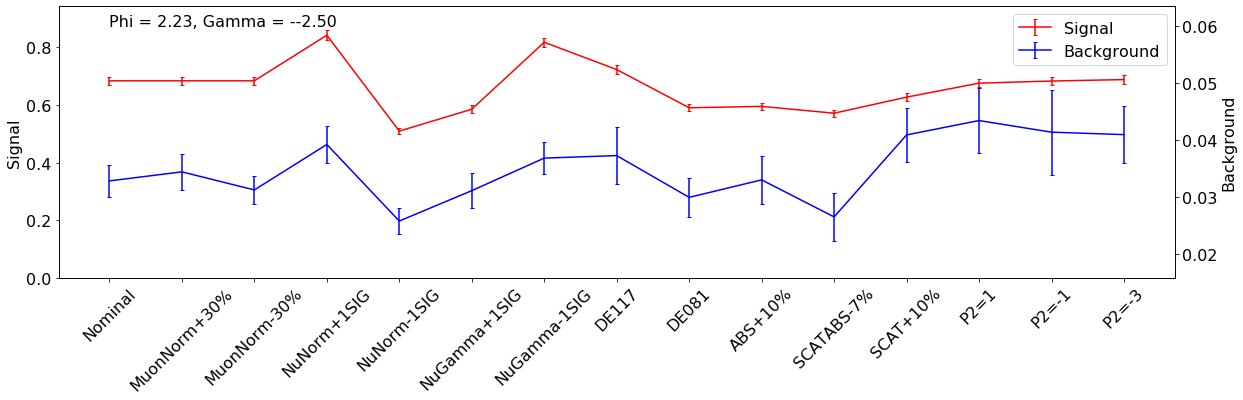

In [185]:
#PHI =1.36
#INDEX = -2.37
PHI =2.23
INDEX = -2.50
#PHI =2.12
#INDEX = -2.87

plt.rcParams.update({'font.size': 16})
fig = plt.figure( figsize=(20, 5), facecolor ='w')
ax1 = fig.add_subplot(111)
ax1.set_ylim(0,np.max(sig)+0.1)
ax1.set_ylabel('Signal')
ax1.errorbar(range(l), sig , yerr= sig_er, color = 'r', capsize = 2,label = 'Signal')
ax1.text(0,np.max(sig)+0.03 ,'Phi = {0:.2f}, Gamma = -{1:.2f}'.format(PHI,INDEX), fontsize =16)
#plt.hlines(y=d.values(), xmin=0, xmax=range(len(d)), color='k', ls = '--')
ax1.set_xticklabels(ax.get_xticks(), rotation = 45)

ax2 = ax1.twinx()
ax2.errorbar(range(l), bkg , yerr= bkg_er, color = 'b', capsize = 2, label = 'Background')
ax2.set_ylim(np.min(bkg)-0.01,np.max(bkg)+0.02)
ax2.set_ylabel('Background')
plt.xticks(range(l), names)
fig.legend(loc=1, bbox_to_anchor=(1,1), bbox_transform=ax1.transAxes)
plt.show()

In [186]:
m = []
for i in range(l):
    m.append([names[i],sig[i]/np.sqrt(sig[i]+bkg[i]),sig[i],sig_er[i],bkg[i],bkg_er[i]])
m = np.array(m)
m = m[m[:, 1].argsort()]
for i in m:
    print('{0:15s} | {1:5.2f} | {2:5.3f}±{3:5.3f} | {4:5.3f}±{5:5.3f}'.format(i[0],float(i[1]),float(i[2]),float(i[3]),float(i[4]),float(i[5])))

NuNorm-1SIG     |  0.70 | 0.509±0.011 | 0.026±0.002
SCATABS-7%      |  0.74 | 0.571±0.013 | 0.027±0.004
NuGamma+1SIG    |  0.75 | 0.585±0.014 | 0.031±0.003
DE081           |  0.75 | 0.590±0.013 | 0.030±0.003
ABS+10%         |  0.75 | 0.595±0.013 | 0.033±0.004
SCAT+10%        |  0.77 | 0.627±0.013 | 0.041±0.005
P2=1            |  0.80 | 0.675±0.015 | 0.043±0.006
P2=-1           |  0.80 | 0.683±0.015 | 0.041±0.007
P2=-3           |  0.81 | 0.688±0.014 | 0.041±0.005
MuonNorm+30%    |  0.81 | 0.683±0.015 | 0.034±0.003
Nominal         |  0.81 | 0.683±0.015 | 0.033±0.003
MuonNorm-30%    |  0.81 | 0.683±0.015 | 0.031±0.003
DE117           |  0.83 | 0.722±0.015 | 0.037±0.005
NuGamma-1SIG    |  0.88 | 0.817±0.016 | 0.037±0.003
NuNorm+1SIG     |  0.90 | 0.841±0.018 | 0.039±0.003


In [187]:
names = ['Nominal','MuonNorm+30%','MuonNorm-30%','NuNorm+1SIG','NuNorm-1SIG','NuGamma+1SIG','NuGamma-1SIG','DE117','DE081','ABS+10%','SCATABS-7%','SCAT+10%','P2=1','P2=-1','P2=-3']
sen =[0.74,0.76,0.75,0.75,0.78,0.62,0.90,0.72,0.90,0.88,0.93,0.81,0.78,0.76,0.74]
sen_er =[0.26,0.22,0.22,0.22,0.21,0.19,0.27,0.22,0.26,0.24,0.28,0.25,0.25,0.24,0.26]
l = len(sig)

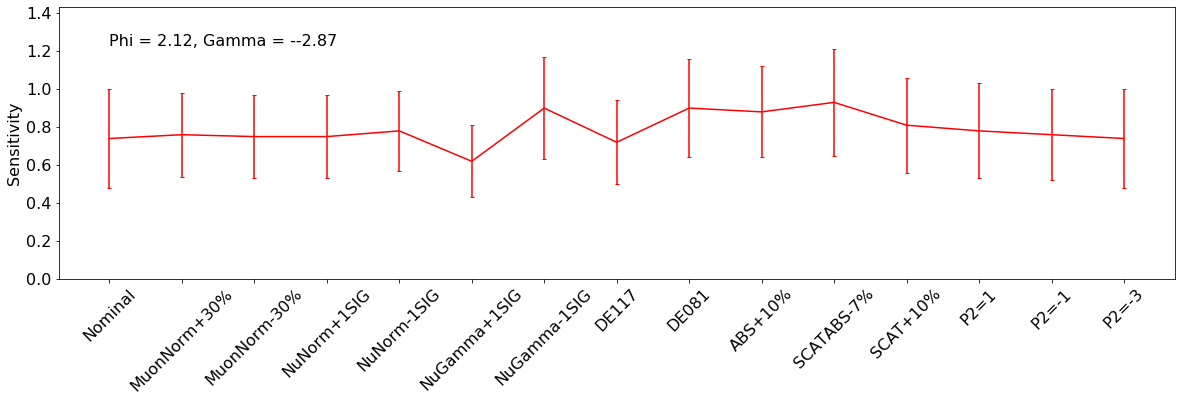

In [188]:
#PHI =1.36
#INDEX = -2.37
#PHI =2.23
#INDEX = -2.50
PHI =2.12
INDEX = -2.87

plt.rcParams.update({'font.size': 16})
fig = plt.figure( figsize=(20, 5), facecolor ='w')
ax1 = fig.add_subplot(111)
ax1.set_ylim(0,np.max(sen)+0.5)
ax1.set_ylabel('Sensitivity')
ax1.errorbar(range(l), sen , yerr= sen_er, color = 'r', capsize = 2,label = 'Sensitivity')
ax1.text(0,np.max(sen)+0.3 ,'Phi = {0:.2f}, Gamma = -{1:.2f}'.format(PHI,INDEX), fontsize =16)
#plt.hlines(y=d.values(), xmin=0, xmax=range(len(d)), color='k', ls = '--')
ax1.set_xticklabels(ax.get_xticks(), rotation = 45)
ax2.set_ylabel('Background')
plt.xticks(range(l), names)
#plt.legend()
plt.show()

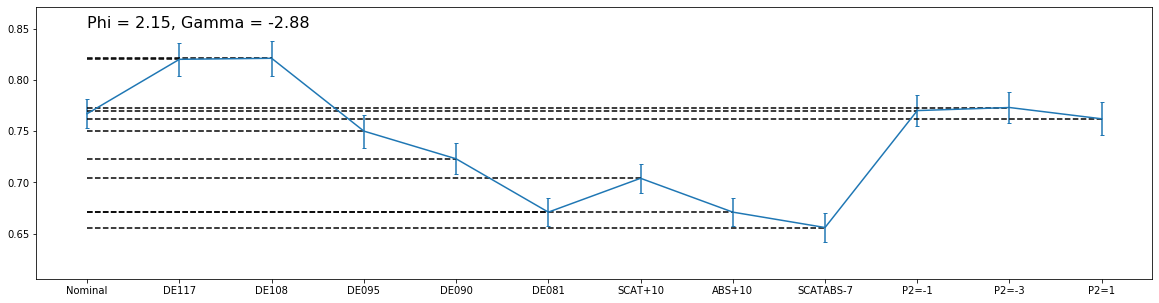

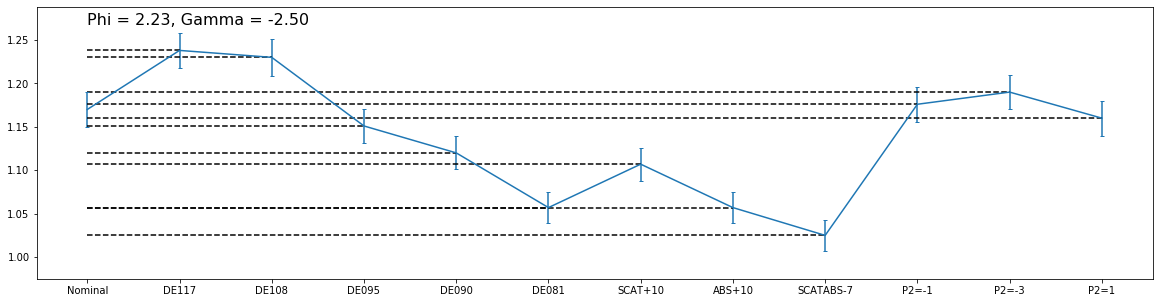

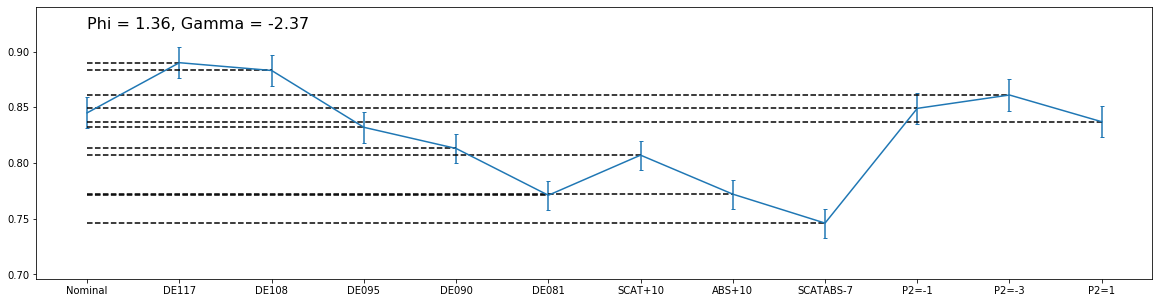

In [231]:
Pltvals(d1,e1,PHI_0,INDEX_0)
Pltvals(d2,e2,PHI_1,INDEX_1)
Pltvals(d3,e3,PHI_2,INDEX_2)

In [266]:
def Plthist(d,PHI,INDEX,b):
    fig = plt.figure( figsize=(20, 5), facecolor ='w')
    l = list(d.values())
    rmin = np.min(l)-0.1
    rmax = np.max(l)+0.1
    n, bins, patches = plt.hist(d.values(), bins =b, range = [rmin,rmax],histtype = 'step')
    (mu, sigma) = norm.fit(l, floc = l[0])
    y = norm.pdf(np.linspace(rmin,rmax,100), mu, sigma)
    plt.text(rmin,np.max(n)+1.5,'Phi = {0:.2f}, Gamma = -{1:.2f}'.format(PHI,INDEX), fontsize =16)
    plt.text(rmin,np.max(n)+1,'Mean = {0:.2f}, STD = {1:.2f}'.format(mu,sigma), fontsize =16)
    l = plt.plot(np.linspace(rmin,rmax,100), y, 'r--', linewidth=2)
    plt.ylim(0,np.max(y)+1)
    plt.show()

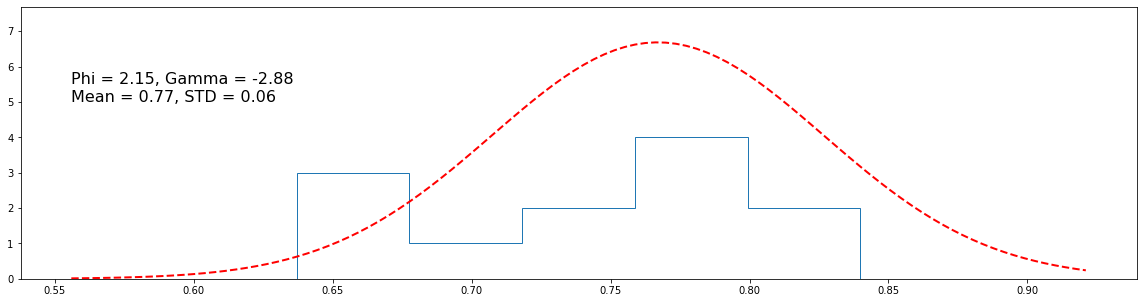

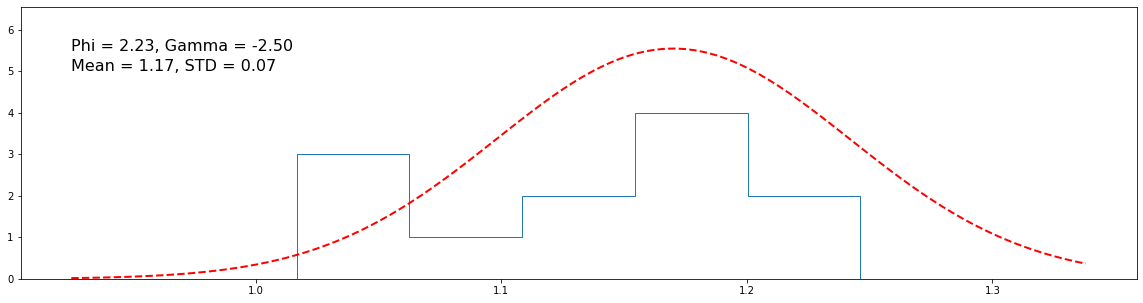

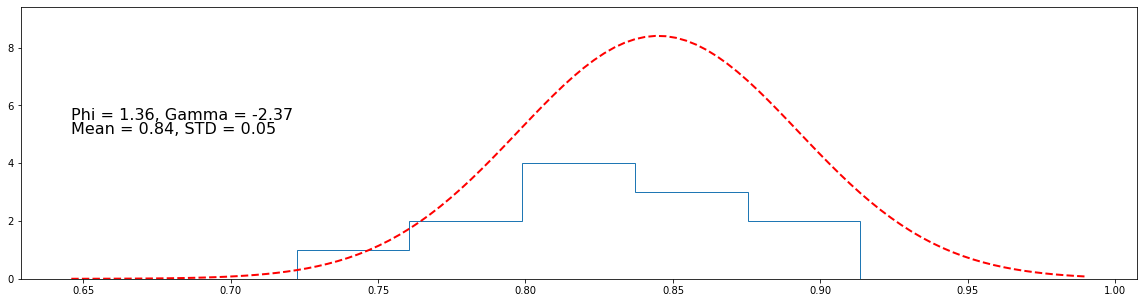

In [267]:
Plthist(d1,PHI_0,INDEX_0,9)
Plthist(d2,PHI_1,INDEX_1,9)
Plthist(d3,PHI_2,INDEX_2,9)

In [139]:
l = list(d.values())
(mu, sigma) = norm.fit(l, floc = 0.767)
print(mu, sigma)

[0.767, 0.82, 0.821, 0.75, 0.723, 0.671, 0.704, 0.671, 0.656, 0.77, 0.773, 0.762]
0.767 0.059681096951491534


Atmospheric neutrinos

In [259]:
#data_amc = np.load('/fastio2/dasha/double_pulse/data_Atmos_NuMu_1_1.npy',mmap_mode='r')
data_amc = np.load('/fastio2/dasha/double_pulse/data_Atmos_NuMuCC.npy',mmap_mode='r')
data_aec = np.load('/fastio2/dasha/double_pulse/data_Atmos_NuE_1_1.npy',mmap_mode='r')
data_cmc = np.load('/fastio2/dasha/double_pulse/data_FLUXES_NuMu_1_1.npy',mmap_mode='r')
data_cec = np.load('/fastio2/dasha/double_pulse/data_FLUXES_NuE_1_1.npy',mmap_mode='r')

In [260]:
print(data_cmc.shape,data_amc.shape)
print(data_cec.shape,data_aec.shape)

(462405,) (776267,)
(420185,) (420185,)


In [261]:
LLH = -0.1
Qst1 = 2000
Qst2 = 10
Qst3 = 10
NET1 =0.99
NET2 =0.98
NET3 =0.85
live_time = 31536000

In [262]:
data_amc = data_amc[np.isfinite(data_amc['logan_veto']['SPE_rlogl']) & np.isfinite(data_amc['logan_veto']['Cascade_rlogl'])]
data_aec = data_aec[np.isfinite(data_aec['logan_veto']['SPE_rlogl']) & np.isfinite(data_aec['logan_veto']['Cascade_rlogl'])]
data_cmc = data_cmc[np.isfinite(data_cmc['logan_veto']['SPE_rlogl']) & np.isfinite(data_cmc['logan_veto']['Cascade_rlogl'])]
data_cec = data_cec[np.isfinite(data_cec['logan_veto']['SPE_rlogl']) & np.isfinite(data_cec['logan_veto']['Cascade_rlogl'])]
    
maskl_amc = data_amc['logan_veto']['SPE_rlogl']-data_amc['logan_veto']['Cascade_rlogl'] > LLH
maskl_aec = data_aec['logan_veto']['SPE_rlogl']-data_aec['logan_veto']['Cascade_rlogl'] > LLH 
maskl_cmc = data_cmc['logan_veto']['SPE_rlogl']-data_cmc['logan_veto']['Cascade_rlogl'] > LLH
maskl_cec = data_cec['logan_veto']['SPE_rlogl']-data_cec['logan_veto']['Cascade_rlogl'] > LLH 

maskq_amc = (data_amc['qst']['q'][:,0] >= Qst1) & (data_amc['qst']['q'][:,1] >= Qst2) & (data_amc['qst']['q'][:,2] >= Qst3)
maskq_aec = (data_aec['qst']['q'][:,0] >= Qst1) & (data_aec['qst']['q'][:,1] >= Qst2) & (data_aec['qst']['q'][:,2] >= Qst3)
maskq_cmc = (data_cmc['qst']['q'][:,0] >= Qst1) & (data_cmc['qst']['q'][:,1] >= Qst2) & (data_cmc['qst']['q'][:,2] >= Qst3)
maskq_cec = (data_cec['qst']['q'][:,0] >= Qst1) & (data_cec['qst']['q'][:,1] >= Qst2) & (data_cec['qst']['q'][:,2] >= Qst3) 

masks_amc = (data_amc['preds']['n1'] >= NET1) & (data_amc['preds']['n2'] >= NET2) & (data_amc['preds']['n3'] >= NET3) 
masks_aec = (data_aec['preds']['n1'] >= NET1) & (data_aec['preds']['n2'] >= NET2) & (data_aec['preds']['n3'] >= NET3)
masks_cmc = (data_cmc['preds']['n1'] >= NET1) & (data_cmc['preds']['n2'] >= NET2) & (data_cmc['preds']['n3'] >= NET3)
masks_cec = (data_cec['preds']['n1'] >= NET1) & (data_cec['preds']['n2'] >= NET2) & (data_cec['preds']['n3'] >= NET3)
    
mask_amc = maskl_amc & maskq_amc & masks_amc
mask_aec = maskl_aec & maskq_aec & masks_aec
mask_cmc = maskl_cmc & maskq_cmc & masks_cmc
mask_cec = maskl_cec & maskq_cec & masks_cec    

In [263]:
print(data_cec[mask_cec].shape,np.sum(data_cec[mask_cec]['weight_val_0']['nom']))
print(data_cmc[mask_cmc].shape,np.sum(data_cmc[mask_cmc]['weight_val_0']['nom']))
print(data_aec[mask_aec].shape,np.sum(data_aec[mask_aec]['weight_c']),np.sum(data_aec[mask_aec]['weight_p']))
print(data_amc[mask_amc].shape,np.sum(data_amc[mask_amc]['weight_c']),np.sum(data_amc[mask_amc]['weight_p']))

(66,) 2.3774369e-10
(330,) 3.6304992e-10
(66,) 1.6913656e-11 1.8590783e-11
(1392,) 1.7760764e-09 1.2096897e-10


In [276]:
data_amc[mask_amc][data_amc[mask_amc]['weight_c'].argsort()]['weight_c'][-30:]

array([1.21133971e-11, 1.26637676e-11, 1.34170765e-11, 1.35481652e-11,
       1.38094258e-11, 1.44470946e-11, 1.51641928e-11, 1.57185237e-11,
       1.65913411e-11, 1.66571808e-11, 1.87652983e-11, 2.02143129e-11,
       2.16111556e-11, 2.16491304e-11, 2.38306389e-11, 2.68993629e-11,
       2.70418705e-11, 3.23137836e-11, 3.32709658e-11, 3.36148470e-11,
       3.48973073e-11, 3.85359557e-11, 3.99585261e-11, 3.99713040e-11,
       4.29533110e-11, 5.03265415e-11, 6.82868137e-11, 7.29686658e-11,
       8.24291052e-11, 1.41846118e-10], dtype=float32)

In [280]:
np.sum(data_amc[mask_amc][data_amc[mask_amc]['weight_c'].argsort()]['weight_c'][-30:])*live_time

0.03202528821333317

In [281]:
print("NuE Astro = {0:.4f} +/- {1:.4f}".format(np.sum(data_cec[mask_cec]['weight_val_0']['nom']*live_time),np.sqrt(np.sum(np.square(data_cec[mask_cec]['weight_val_0']['nom']*live_time)))))
print("NuE Conv = {0:.4f} +/- {1:.4f}".format(np.sum(data_aec[mask_aec]['weight_c']*live_time),np.sqrt(np.sum(np.square(data_aec[mask_aec]['weight_c']*live_time)))))
print("NuE Prompt = {0:.4f} +/- {1:.4f}".format(np.sum(data_aec[mask_aec]['weight_p']*live_time),np.sqrt(np.sum(np.square(data_aec[mask_aec]['weight_p']*live_time)))))
print(" ")
print("NuMu Astro = {0:.4f} +/- {1:.4f}".format(np.sum(data_cmc[mask_cmc]['weight_val_0']['nom']*live_time),np.sqrt(np.sum(np.square(data_cmc[mask_cmc]['weight_val_0']['nom']*live_time)))))
print("NuMu Conv = {0:.4f} +/- {1:.4f}".format(np.sum(data_amc[mask_amc]['weight_c']*live_time/4),np.sqrt(np.sum(np.square(data_amc[mask_amc]['weight_c']*live_time/4)))))
print("NuMu Prompt = {0:.4f} +/- {1:.4f}".format(np.sum(data_amc[mask_amc]['weight_p']*live_time/4),np.sqrt(np.sum(np.square(data_amc[mask_amc]['weight_p']*live_time/4)))))


NuE Astro = 0.0075 +/- 0.0014
NuE Conv = 0.0005 +/- 0.0002
NuE Prompt = 0.0006 +/- 0.0001
 
NuMu Astro = 0.0114 +/- 0.0015
NuMu Conv = 0.0140 +/- 0.0019
NuMu Prompt = 0.0010 +/- 0.0001


In [249]:
#np.sort(data_amc[mask_amc]['weight_c']*live_time)[::-1]
data_amc[mask_amc][data_amc[mask_amc]['weight_c'].argsort()][-1:]

ValueError: no field of name weight_val_0

In [250]:
data_cmc[mask_cmc][data_cmc[mask_cmc]['qtot']==3981.525 ]['weight_val_0']['nom']

array([2.655869e-11], dtype=float32)

In [ ]:
def Plot(Name,Label,data1,data2,data3,xscale='linear',b =200,r =[0,1], loc =8):
    fig = plt.figure(figsize=(20, 5),facecolor ='w')
    ax = fig.add_subplot(111)
    plt.rcParams.update({'font.size': 16})
    plt.ticklabel_format(axis='both', style='sci', scilimits=(-5,5))
    ax.set_xscale(xscale)
    ax.set_yscale('log')
    ax.set_title(Name, fontsize = 16)
    ax.text(0.01,0.86,'#NuE '+str(len(data)), transform=ax.transAxes, color = "black",fontsize=12)  
    ax.set_xlabel(Label, fontsize = 16)                                                              
    ax.set_ylabel("#Events per Year", fontsize = 16)                                                   
    ax.hist(data1, weights = data1['weight_val_0']['nom'],bins =b, histtype = 'step',edgecolor ='k', lw =2, range = r, label = "NuE")  
    
    plt.legend(loc=loc)

In [5]:
data_ctc0 = np.load('/fastio2/dasha/double_pulse/data_conv_NuTauCC.npy',mmap_mode='r')
data_ctn0 = np.load('/fastio2/dasha/double_pulse/data_conv_NuTauNC.npy',mmap_mode='r')
data_cmc0 = np.load('/fastio2/dasha/double_pulse/data_conv_NuMuCC.npy',mmap_mode='r')
data_cmn0 = np.load('/fastio2/dasha/double_pulse/data_conv_NuMuNC.npy',mmap_mode='r')
data_cec0 = np.load('/fastio2/dasha/double_pulse/data_conv_NuECC.npy',mmap_mode='r')
data_cen0 = np.load('/fastio2/dasha/double_pulse/data_conv_NuENC.npy',mmap_mode='r')
data_ceg0 = np.load('/fastio2/dasha/double_pulse/data_conv_NuEGR.npy',mmap_mode='r')
data_c0 = np.load('/fastio2/dasha/double_pulse/data_MuonGun_all.npy',mmap_mode='r')

In [6]:
data_ctc,data_ctn,data_cmc,data_cmn,data_cec,data_cen,data_ceg,data_c=\
EventSelection(data_ctc0,data_ctn0,data_cmc0,data_cmn0,data_cec0,data_cen0,data_ceg0,data_c0)

In [7]:
GetRatesAtmos(secs_per_year,data_ctc,data_ctn,data_cmc,data_cmn,data_cec,data_cen,data_ceg,data_c)

Conv
NuTauCC = 0.00000000000000000000 +/- 0.0000000
NuTauCN = 0.00000000000000000000 +/- 0.0000000
NuMuCC =  0.01459530335939652687 +/- 0.0024054
NuMuCN =  0.00202909513973844073 +/- 0.0004711
NuECC =   0.00046545782435475456 +/- 0.0001416
NuECN =   0.00005682068484561518 +/- 0.0000153
NuEGR =   0.00000000000000000000 +/- 0.0000000
Prompt
NuTauCC = 0.0000000 +/- 0.0000000
NuTauCN = 0.0000000 +/- 0.0000000
NuMuCC =  0.0000000 +/- 0.0000000
NuMuCN =  0.0000000 +/- 0.0000000
NuECC =   0.0000000 +/- 0.0000000
NuECN =   0.0000000 +/- 0.0000000
NuEGR =   0.0000000 +/- 0.0000000


In [13]:
data_ctc,data_ctn,data_cmc,data_cmn,data_cec,data_cen,data_ceg,data_c=\
EventSelectionPreCut(data_ctc0,data_ctn0,data_cmc0,data_cmn0,data_cec0,data_cen0,data_ceg0,data_c0)

In [14]:
GetRatesAtmos(secs_per_year,data_ctc,data_ctn,data_cmc,data_cmn,data_cec,data_cen,data_ceg,data_c)

Conv
NuTauCC = 0.00000000000000000000 +/- 0.0000000
NuTauCN = 0.00000000000000000000 +/- 0.0000000
NuMuCC =  26.12682882570517506338 +/- 0.3802287
NuMuCN =  85.54710839424912194318 +/- 1.3237101
NuECC =   7.37585392282081198090 +/- 0.0589035
NuECN =   2.76115368391889237643 +/- 0.0355152
NuEGR =   0.00000000000000000000 +/- 0.0000000
Prompt
NuTauCC = 0.0000000 +/- 0.0000000
NuTauCN = 0.0000000 +/- 0.0000000
NuMuCC =  0.0000000 +/- 0.0000000
NuMuCN =  0.0000000 +/- 0.0000000
NuECC =   0.0000000 +/- 0.0000000
NuECN =   0.0000000 +/- 0.0000000
NuEGR =   0.0000000 +/- 0.0000000


In [17]:
data_ptc0 = np.load('/fastio2/dasha/double_pulse/data_prompt_NuTauCC.npy',mmap_mode='r')
data_ptn0 = np.load('/fastio2/dasha/double_pulse/data_prompt_NuTauNC.npy',mmap_mode='r')
data_pmc0 = np.load('/fastio2/dasha/double_pulse/data_prompt_NuMuCC.npy',mmap_mode='r')
data_pmn0 = np.load('/fastio2/dasha/double_pulse/data_prompt_NuMuNC.npy',mmap_mode='r')
data_pec0 = np.load('/fastio2/dasha/double_pulse/data_prompt_NuECC.npy',mmap_mode='r')
data_pen0 = np.load('/fastio2/dasha/double_pulse/data_prompt_NuENC.npy',mmap_mode='r')
data_peg0 = np.load('/fastio2/dasha/double_pulse/data_prompt_NuEGR.npy',mmap_mode='r')
data_c0 = np.load('/fastio2/dasha/double_pulse/data_MuonGun_all.npy',mmap_mode='r')

In [18]:
data_ptc,data_ptn,data_pmc,data_pmn,data_pec,data_pen,data_peg,data_c=\
EventSelection(data_ptc0,data_ptn0,data_pmc0,data_pmn0,data_pec0,data_pen0,data_peg0,data_c0)

In [19]:
GetRatesAtmos(secs_per_year,data_ptc,data_ptn,data_pmc,data_pmn,data_pec,data_pen,data_peg,data_c)

Conv
NuTauCC = 0.00000000000000000000 +/- 0.0000000
NuTauCN = 0.00000000000000000000 +/- 0.0000000
NuMuCC =  0.00000000000000000000 +/- 0.0000000
NuMuCN =  0.00000000000000000000 +/- 0.0000000
NuECC =   0.00000000000000000000 +/- 0.0000000
NuECN =   0.00000000000000000000 +/- 0.0000000
NuEGR =   0.00000000000000000000 +/- 0.0000000
Prompt
NuTauCC = 0.0000000 +/- 0.0000000
NuTauCN = 0.0000000 +/- 0.0000000
NuMuCC =  0.0008979 +/- 0.0001311
NuMuCN =  0.0001643 +/- 0.0000265
NuECC =   0.0006055 +/- 0.0001534
NuECN =   0.0002087 +/- 0.0000437
NuEGR =   0.0000423 +/- 0.0000169


In [20]:
data_ptc,data_ptn,data_pmc,data_pmn,data_pec,data_pen,data_peg,data_c=\
EventSelectionPreCut(data_ptc0,data_ptn0,data_pmc0,data_pmn0,data_pec0,data_pen0,data_peg0,data_c0)

In [21]:
GetRatesAtmos(secs_per_year,data_ptc,data_ptn,data_pmc,data_pmn,data_pec,data_pen,data_peg,data_c)

Conv
NuTauCC = 0.00000000000000000000 +/- 0.0000000
NuTauCN = 0.00000000000000000000 +/- 0.0000000
NuMuCC =  0.00000000000000000000 +/- 0.0000000
NuMuCN =  0.00000000000000000000 +/- 0.0000000
NuECC =   0.00000000000000000000 +/- 0.0000000
NuECN =   0.00000000000000000000 +/- 0.0000000
NuEGR =   0.00000000000000000000 +/- 0.0000000
Prompt
NuTauCC = 0.0000000 +/- 0.0000000
NuTauCN = 0.0000000 +/- 0.0000000
NuMuCC =  0.3912037 +/- 0.0043027
NuMuCN =  0.9178239 +/- 0.0072212
NuECC =   2.6639539 +/- 0.0115277
NuECN =   0.8958750 +/- 0.0066258
NuEGR =   0.0364095 +/- 0.0016918


In [ ]:
Qst1 = 2000
Qst2 = 10
Qst3 = 10

maskq_ctc = (data_ctc['qst']['q'][:,0] >= Qst1) & (data_ctc['qst']['q'][:,1] >= Qst2) & (data_ctc['qst']['q'][:,2] >= Qst3)
maskq_ctn = (data_ctn['qst']['q'][:,0] >= Qst1) & (data_ctn['qst']['q'][:,1] >= Qst2) & (data_ctn['qst']['q'][:,2] >= Qst3)
maskq_cmc = (data_cmc['qst']['q'][:,0] >= Qst1) & (data_cmc['qst']['q'][:,1] >= Qst2) & (data_cmc['qst']['q'][:,2] >= Qst3)
maskq_cmn = (data_cmn['qst']['q'][:,0] >= Qst1) & (data_cmn['qst']['q'][:,1] >= Qst2) & (data_cmn['qst']['q'][:,2] >= Qst3) 
maskq_cec = (data_cec['qst']['q'][:,0] >= Qst1) & (data_cec['qst']['q'][:,1] >= Qst2) & (data_cec['qst']['q'][:,2] >= Qst3)
maskq_cen = (data_cen['qst']['q'][:,0] >= Qst1) & (data_cen['qst']['q'][:,1] >= Qst2) & (data_cen['qst']['q'][:,2] >= Qst3)
maskq_ceg = (data_ceg['qst']['q'][:,0] >= Qst1) & (data_ceg['qst']['q'][:,1] >= Qst2) & (data_ceg['qst']['q'][:,2] >= Qst3) 
